In [9]:
# helper functions
from frb_functions import *
import pandas as pd
from copy import deepcopy

## Webscraping Federal Reserve (Fed) Speeches

The first corpus I will be working with are the speeches that are made by Federal Reserve members and subsequently published on the Fed website. These speeches can help us identify the topics of interest to the Fed.

The FOMC statements are released on the "speech" portion of the Fed website.

In [ ]:
# webscrape speech text from Fed website
speech_urls = navigate_frb_speeches()
speeches = get_frb_speech_text(speech_urls)
speeches_df = pd.DataFrame(frb_articles,
                               columns=['url', 'speech_date', 'title', 'speaker', 'location', 'full_text'])

In [2]:
# webscrape archived speech text from Fed website
speech_urls, speakers, locations, dates_, titles = navigate_frb_archived_speeches()
speech_text = get_frb_speech_text_archived(speech_urls)
# Combine scraped text 
archived_speeches = list(zip(speech_urls, dates_, titles, speakers, locations, speech_text))
archived_speeches_df = pd.DataFrame(archived_speeches,
                                                 columns=['url', 'speech_date', 'title',
                                                          'speaker', 'location', 'full_text'])

In [37]:
# Combine archived & recent speech dataframes
df_raw = pd.concat([speeches_df, archived_speeches_df])
# Save to pickle
df_raw.to_pickle('frb_speeches_all_raw.pkl')

## Cleaning Speech Text

In [12]:
#importing pandas DataFrame of speech text and metadata
df_raw = pd.read_pickle('frb_speeches_all_raw.pkl')

In [13]:
df_raw.shape

(1432, 6)

In [14]:
df_raw.head()

,url,speech_date,title,speaker,location,full_text
0,https://www.federalreserve.gov/newsevents/spee...,"November 14, 2019",The Federal Reserve’s Review of Its Monetary P...,Vice Chair Richard H. Clarida,"At ""Fed Policy: A Shadow Review"" Cato Institut...",I am delighted to be at the Cato Institute tod...
1,https://www.federalreserve.gov/newsevents/spee...,"November 14, 2019",Brief Remarks (via pre-recorded video),Vice Chair for Supervision Randal K. Quarles,"At ""Supervision in a Digital Era,"" the 26th An...",Vice Chair for Supervision Quarles brief remar...
2,https://www.federalreserve.gov/newsevents/spee...,"November 12, 2019","Monetary Policy, Price Stability, and Equilibr...",Vice Chair Richard H. Clarida,"At the High-Level Conference on Global Risk, U...",Good morning. I am honored and delighted to pa...
3,https://www.federalreserve.gov/newsevents/spee...,"November 08, 2019",Why Climate Change Matters for Monetary Policy...,Governor Lael Brainard,"At ""The Economics of Climate Change"" a researc...",I want to thank my colleagues at the Federal R...
4,https://www.federalreserve.gov/newsevents/spee...,"November 01, 2019",Friedrich Hayek and the Price System,Vice Chair for Supervision Randal K. Quarles,"At ""The Road to Serfdom at 75: The Future of C...",I am delighted to be back in New Haven and par...


In [15]:
# example of dirty text
df_raw.iloc[0]['full_text'][-500:]

"contributions of projections and assessments from all FOMC participants, it captures a broader range of views than those of FOMC members. For a discussion and data, see Bernanke (2007) and Romer (2010). Return to text\n19. Information about the review and the events associated with it are available on the Board's website at https://www.federalreserve.gov/monetarypolicy/review-of-monetary-policy-strategy-tools-and-communications.htm. Return to text\n20. See Board of Governors (2019). Return to text"

In [16]:
# Function removes references at the bottom of some speeches,
# links, special characters like hyphens, numbers, and 
# text like "return to page" on the bottom of the website
df = clean_speech_text(df_raw)

In [17]:
# example of dirty text
df.iloc[0]['full_text'][-500:]

'ngress has assigned us For this reason my colleagues and I do not want to preempt or to predict our ultimate findings What I can say is that any refinements or more material changes to our framework that we might make will be aimed solely at enhancing our ability to achieve and sustain our dual mandate objectives in the world we live in today Thank you very much for your time and attention I trust that todays conference will provide stimulating discussion of issues that are central to our review'

In [18]:
df = df.reset_index()
df = df.rename(columns={'index': 'index_no'})

In [19]:
df.head()

,index_no,url,speech_date,title,speaker,location,full_text
0,0,https://www.federalreserve.gov/newsevents/spee...,"November 14, 2019",The Federal Reserve’s Review of Its Monetary P...,Vice Chair Richard H. Clarida,"At ""Fed Policy: A Shadow Review"" Cato Institut...",I am delighted to be at the Cato Institute tod...
1,1,https://www.federalreserve.gov/newsevents/spee...,"November 14, 2019",Brief Remarks (via pre-recorded video),Vice Chair for Supervision Randal K. Quarles,"At ""Supervision in a Digital Era,"" the 26th An...",Vice Chair for Supervision Quarles brief remar...
2,2,https://www.federalreserve.gov/newsevents/spee...,"November 12, 2019","Monetary Policy, Price Stability, and Equilibr...",Vice Chair Richard H. Clarida,"At the High-Level Conference on Global Risk, U...",Good morning I am honored and delighted to par...
3,3,https://www.federalreserve.gov/newsevents/spee...,"November 08, 2019",Why Climate Change Matters for Monetary Policy...,Governor Lael Brainard,"At ""The Economics of Climate Change"" a researc...",I want to thank my colleagues at the Federal R...
4,4,https://www.federalreserve.gov/newsevents/spee...,"November 01, 2019",Friedrich Hayek and the Price System,Vice Chair for Supervision Randal K. Quarles,"At ""The Road to Serfdom at 75: The Future of C...",I am delighted to be back in New Haven and par...


In [20]:
# First tags the part of speech using nltk.pos_tag
# and then uses the WordNetLemmatizer from nltk.stem
df['lemm'] = df['full_text'].apply(lambda x: lemmatize_speech_text(x))

In [21]:
# original text
df.iloc[0]['full_text'][554:650]

'believe our existing framework which has been in place since  has served us well and has enabled'

In [22]:
# lemmatized tokens
df.iloc[0]['lemm'][100:117]

['believe',
 'our',
 'exist',
 'framework',
 'which',
 'have',
 'be',
 'in',
 'place',
 'since',
 'have',
 'serve',
 'u',
 'well',
 'and',
 'have',
 'enable']

In [23]:
# count number of unique, lemmatized tokens
df['unique_lemm_words'] = df['lemm'].apply(lambda x: count_unique_words(x))

In [24]:
# find 20 most common lemmatized tokens for each speech
df['common_20_lemm_words'] = df['lemm'].apply(lambda x: get_most_common_words(x, num=20))

In [25]:
# Notice how the most comment words are "the", "and", "of", etc.
# We need to remove stop words
df[['index_no', 'title', 'common_20_lemm_words']].head()

,index_no,title,common_20_lemm_words
0,0,The Federal Reserve’s Review of Its Monetary P...,"[(the, 152), (and, 74), (be, 64), (to, 63), (o..."
1,1,Brief Remarks (via pre-recorded video),"[(the, 98), (of, 43), (and, 41), (be, 39), (to..."
2,2,"Monetary Policy, Price Stability, and Equilibr...","[(the, 290), (and, 134), (in, 133), (of, 117),..."
3,3,Why Climate Change Matters for Monetary Policy...,"[(the, 111), (to, 87), (and, 75), (of, 50), (b..."
4,4,Friedrich Hayek and the Price System,"[(the, 228), (of, 147), (be, 112), (a, 111), (..."


In [3]:
# Remove stopwords using english stopwords list in nltk.corpus
# Then, re-calculate unique lemmatized words after removing stop words
# and get the most common 20 words
df['stopped_lemm_words'] = df['lemm'].apply(lambda x: remove_stop_words(x))
df['common_20_stopped_lemm_words'] = df['stopped_lemm_words'].apply(lambda x: get_most_common_words(x, num=20))
df['unique_stopped_lemm_words'] = df['stopped_lemm_words'].apply(lambda x: count_unique_words(x))

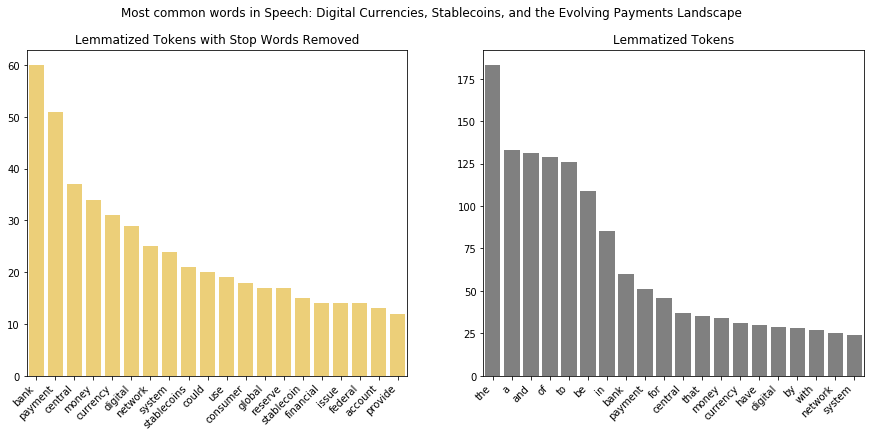

In [6]:
# Visual example of stop word removal, based on 20 most common words in the speech
plot_most_common_words(df, article_num=9)

In [16]:
# Save to pickle
df.to_pickle('test.pkl')

In [17]:
#importing pandas DataFrame of speech text and metadata
df = pd.read_pickle('test.pkl')